<a href="https://colab.research.google.com/github/Educat8n/Invited_Talks/blob/master/ODSC-West-2022/SequentialAPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## import packages
import tensorflow.keras as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf


## Define Globals
EPOCHS = 200
BATCH_SIZE = 128 
VERBOSE = 1
NB_CLASSES = 10 # number of outputs = number of digits
N_HIDDEN = 128
VALIDATION_SPLIT = 0.2 # how much TRAIN is reserved for VALIDATION 
DROPOUT = 0.3
INPUT_SHAPE = (28, 28)

In [2]:
model_sequential = Sequential()
model_sequential.add(Flatten(input_shape=INPUT_SHAPE))
model_sequential.add(Dense(N_HIDDEN, name='dense_layer_1', activation='relu')) 
model_sequential.add(Dense(N_HIDDEN, name='dense_layer_2', activation='relu'))
model_sequential.add(Dense(NB_CLASSES, name='dense_layer_3', activation='softmax'))

In [3]:
model_sequential.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_layer_1 (Dense)       (None, 128)               100480    
                                                                 
 dense_layer_2 (Dense)       (None, 128)               16512     
                                                                 
 dense_layer_3 (Dense)       (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


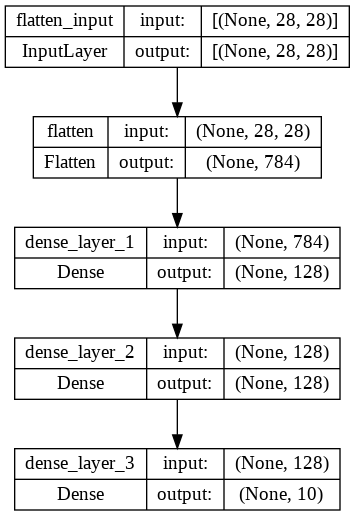

In [4]:
K.utils.plot_model(model_sequential, to_file="model.png", show_shapes=True)

In [5]:
mnist = K.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

#x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.33, random_state=42)


11490434/11490434 [==============================] - 0s 0us/step


In [6]:
model_sequential.compile(
  optimizer=K.optimizers.RMSprop(),  # Optimizer
  # Loss function to minimize
  loss=K.losses.SparseCategoricalCrossentropy(),
  # List of metrics to monitor
  metrics=[K.metrics.SparseCategoricalAccuracy()],
)

In [7]:
history = model_sequential.fit(
    x_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    validation_split= VALIDATION_SPLIT ,
    verbose=VERBOSE,
)


Epoch 1/200
375/375 [==============================] - 6s 7ms/step - loss: 0.3362 - sparse_categorical_accuracy: 0.9035 - val_loss: 0.1649 - val_sparse_categorical_accuracy: 0.9528
Epoch 2/200
375/375 [==============================] - 2s 6ms/step - loss: 0.1438 - sparse_categorical_accuracy: 0.9580 - val_loss: 0.1166 - val_sparse_categorical_accuracy: 0.9661
Epoch 3/200
375/375 [==============================] - 2s 6ms/step - loss: 0.0995 - sparse_categorical_accuracy: 0.9706 - val_loss: 0.1043 - val_sparse_categorical_accuracy: 0.9703
Epoch 4/200
375/375 [==============================] - 2s 6ms/step - loss: 0.0738 - sparse_categorical_accuracy: 0.9776 - val_loss: 0.0964 - val_sparse_categorical_accuracy: 0.9712
Epoch 5/200
375/375 [==============================] - 2s 4ms/step - loss: 0.0569 - sparse_categorical_accuracy: 0.9825 - val_loss: 0.1007 - val_sparse_categorical_accuracy: 0.9710
Epoch 6/200
375/375 [==============================] - 1s 3ms/step - loss: 0.0454 - sparse_cate

In [8]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)


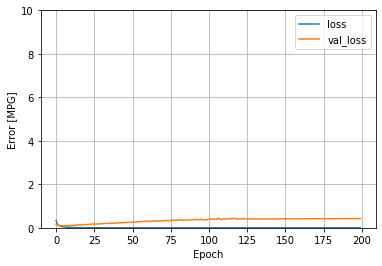

In [9]:
plot_loss(history)

In [10]:
results = model_sequential.evaluate(x_test, y_test, batch_size=128)

79/79 [==============================] - 0s 2ms/step - loss: 0.3370 - sparse_categorical_accuracy: 0.9814


In [11]:
predictions = model_sequential.predict(tf.expand_dims(x_test[3], axis=0))

1/1 [==============================] - 0s 76ms/step


In [12]:
print(f"The predicted number is {np.argmax(predictions)} and ground truth is {y_test[3]}")

The predicted number is 0 and ground truth is 0


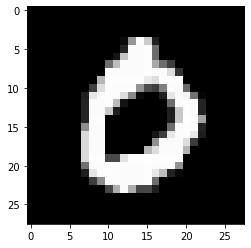

In [13]:
plt.imshow(x_test[3], cmap='gray')